In [1]:
import pandas as pd
import glob

# open dataset

In [2]:
datasets = glob.glob("./*.csv")
datasets

['./HEAR.csv',
 './HEAT.csv',
 './HEAX.csv',
 './HEBL.csv',
 './HECA.csv',
 './HEGN.csv',
 './HEIS.csv',
 './HELX.csv',
 './HEMA.csv',
 './HEMM.csv',
 './HEPS.csv',
 './HESC.csv',
 './HESH.csv']

In [3]:
databases = []
for d in datasets:
    databases.append(pd.read_csv(d))
databases[1].head()

/home/marwa/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/marwa/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,station,valid,tmpc,dwpc,relh,drct,sknt,mslp,vsby,gust,skyc1,skyc2,skyc3,wxcodes
0,HEAT,2011-01-02 11:00,18.0,7.0,48.55,10.0,9.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
1,HEAT,2011-01-29 08:00,23.0,-3.0,17.46,230.0,11.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
2,HEAT,2011-01-31 15:00,20.0,5.0,37.32,340.0,5.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
3,HEAT,2011-03-01 08:00,16.0,3.0,41.71,40.0,5.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
4,HEAT,2011-04-27 23:00,24.0,6.0,31.34,20.0,4.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN


In [4]:
stations = []
for n in datasets:
    stations.append(n[2:6])
    
stations    

['HEAR',
 'HEAT',
 'HEAX',
 'HEBL',
 'HECA',
 'HEGN',
 'HEIS',
 'HELX',
 'HEMA',
 'HEMM',
 'HEPS',
 'HESC',
 'HESH']

In [26]:
def rename_col(df):
    for s in df:
        s.rename(columns={'valid' : 'date',
                          'tmpc' : 'temp',
                          'dwpc' : 'dew',
                          'relh' : 'rh',
                          'drct' : 'wind_dir',
                          'sknt' : 'wind_speed',
                          'mslp' : 'p',
                          'vsby' : 'vis',
                          'gust' : 'g',
                          'skyc1' : 'cl1',
                          'skyc2' : 'cl2',
                          'skyc3' : 'cl3',
                          'wxcodes' : 'ww',}, inplace=True)
    return(df)

In [22]:
databases = rename_col(databases)
databases[0].head()

,station,date,temp,dew,rh,wind_dir,wind_speed,p,vis,g,cl1,cl2,cl3,ww
0,HEAR,2011-01-13 09:00:00,19.0,3.0,34.51,160.0,7.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
1,HEAR,2011-01-13 19:00:00,11.0,9.0,87.47,0.0,0.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
2,HEAR,2011-01-29 14:00:00,22.0,8.0,40.57,300.0,10.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
3,HEAR,2011-05-21 08:00:00,24.0,16.0,60.90,60.0,6.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
4,HEAR,2011-06-07 09:00:00,29.0,18.0,51.47,360.0,6.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN


In [6]:
for s in databases:
    s['date'] = pd.to_datetime(s['date'])
databases[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89099 entries, 0 to 89098
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   station     89099 non-null  object        
 1   date        89099 non-null  datetime64[ns]
 2   temp        89032 non-null  float64       
 3   dew         89032 non-null  float64       
 4   rh          88939 non-null  float64       
 5   wind_dir    88737 non-null  float64       
 6   wind_speed  89060 non-null  float64       
 7   p           0 non-null      float64       
 8   vis         89030 non-null  float64       
 9   g           1 non-null      float64       
 10  cl1         53875 non-null  object        
 11  cl2         10718 non-null  object        
 12  cl3         724 non-null    object        
 13  ww          2428 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 9.5+ MB


In [7]:
noOfRaws = {}
i=0
for s in databases:
    noOfRaws[stations[i]] = {'noOfRaws' : s.shape[0],
                             'start_date' : s.loc[0, 'date'],
                             'end_date' : s.loc[len(s['date'])-1, 'date']}
    i += 1
pd.DataFrame(noOfRaws)

,HEAR,HEAT,HEAX,HEBL,HECA,HEGN,HEIS,HELX,HEMA,HEMM,HEPS,HESC,HESH
noOfRaws,45568,82504,89099,61135,200035,90216,19244,90163,70372,89784,88826,66873,89063
start_date,2011-01-13 09:00:00,2011-01-02 11:00:00,2011-01-01 00:00:00,2012-01-01 07:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2011-01-13 11:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-11 12:00:00,2011-01-01 00:00:00
end_date,2020-04-19 07:00:00,2021-08-30 23:00:00,2021-08-30 23:00:00,2021-08-30 23:00:00,2021-08-30 23:30:00,2021-08-30 23:00:00,2021-08-30 16:00:00,2021-08-30 23:00:00,2021-08-30 23:00:00,2021-08-30 23:00:00,2021-08-30 23:00:00,2021-08-30 23:00:00,2021-08-30 23:00:00


# open another dataset

In [8]:
datasets2 = glob.glob("./08/*.csv")
datasets2

['./08/HEAT.csv',
 './08/HEAX.csv',
 './08/HEBL.csv',
 './08/HECA.csv',
 './08/HEGN.csv',
 './08/HEIS.csv',
 './08/HELX.csv',
 './08/HEMA.csv',
 './08/HEMM.csv',
 './08/HEPS.csv',
 './08/HESC.csv',
 './08/HESH.csv']

In [9]:
databases2 = []
for d in datasets2:
    databases2.append(pd.read_csv(d))
databases2[1].head()

,station,valid,tmpc,dwpc,relh,drct,sknt,mslp,vsby,gust,skyc1,skyc2,skyc3,wxcodes
0,HEAX,2021-08-31 00:00,26.0,22.0,78.62,340.0,8.0,NaN,6.21,NaN,SCT,NaN,NaN,NaN
1,HEAX,2021-08-31 01:00,26.0,21.0,73.95,330.0,6.0,NaN,6.21,NaN,SCT,NaN,NaN,NaN
2,HEAX,2021-08-31 02:00,26.0,22.0,78.62,320.0,6.0,NaN,6.21,NaN,SCT,NaN,NaN,NaN
3,HEAX,2021-08-31 03:00,26.0,22.0,78.62,340.0,5.0,NaN,6.21,NaN,SCT,NaN,NaN,NaN
4,HEAX,2021-08-31 04:00,27.0,22.0,74.11,320.0,4.0,NaN,6.21,NaN,SCT,NaN,NaN,NaN


In [27]:
databases2 = rename_col(databases2)

# Concate the two datasets

In [50]:
for i in range(len(databases2)):
    databases[i+1] = pd.concat([databases[i+1], databases2[i]]) 
databases[2].shape

(89804, 14)

In [52]:
databases[3].head()

,station,date,temp,dew,rh,wind_dir,wind_speed,p,vis,g,cl1,cl2,cl3,ww
0,HEBL,2012-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN
1,HEBL,2012-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN
2,HEBL,2012-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN
3,HEBL,2012-01-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN
4,HEBL,2012-01-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN


In [54]:
databases[3].tail()

,station,date,temp,dew,rh,wind_dir,wind_speed,p,vis,g,cl1,cl2,cl3,ww
657,HEBL,2021-09-29 17:00,30.0,5.0,20.54,320.0,6.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
658,HEBL,2021-09-29 18:00,29.0,5.0,21.76,330.0,8.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
659,HEBL,2021-09-29 19:00,28.0,7.0,26.49,330.0,4.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
660,HEBL,2021-09-29 20:00,27.0,9.0,32.18,320.0,5.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
661,HEBL,2021-09-29 21:00,26.0,8.0,31.90,320.0,6.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN


# Deling with data
## Join the wanted columns
### Add suffix for each station within the database

In [56]:
suffi = []
for n in datasets:
    suffi.append(n[4:6])
    
suffi 

['AR', 'AT', 'AX', 'BL', 'CA', 'GN', 'IS', 'LX', 'MA', 'MM', 'PS', 'SC', 'SH']

In [57]:
def suffix(df, suffi):
    df = df.add_suffix("_" + suffi)
    return(df)

In [58]:
for i in range(len(databases)):
    databases[i] = suffix(databases[i], suffi[i])

In [60]:
len(databases)

13

In [64]:
databases[0].head()

,station_AR,date_AR,temp_AR,dew_AR,rh_AR,wind_dir_AR,wind_speed_AR,p_AR,vis_AR,g_AR,cl1_AR,cl2_AR,cl3_AR,ww_AR
0,HEAR,2011-01-13 09:00:00,19.0,3.0,34.51,160.0,7.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
1,HEAR,2011-01-13 19:00:00,11.0,9.0,87.47,0.0,0.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
2,HEAR,2011-01-29 14:00:00,22.0,8.0,40.57,300.0,10.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
3,HEAR,2011-05-21 08:00:00,24.0,16.0,60.90,60.0,6.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
4,HEAR,2011-06-07 09:00:00,29.0,18.0,51.47,360.0,6.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN


### Create another column for date to make the original date the index

In [65]:
for i in range(len(databases)):
    col = "date" + "_" + suffi[i]
    databases[i]['date'] = databases[i][col]  

### Make the original date the index

In [66]:
for i in range(len(databases)):
    databases[i] = databases[i].set_index('date')
databases[0].head()

,station_AR,date_AR,temp_AR,dew_AR,rh_AR,wind_dir_AR,wind_speed_AR,p_AR,vis_AR,g_AR,cl1_AR,cl2_AR,cl3_AR,ww_AR
date,,,,,,,,,,,,,,
2011-01-13 09:00:00,HEAR,2011-01-13 09:00:00,19.0,3.0,34.51,160.0,7.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
2011-01-13 19:00:00,HEAR,2011-01-13 19:00:00,11.0,9.0,87.47,0.0,0.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
2011-01-29 14:00:00,HEAR,2011-01-29 14:00:00,22.0,8.0,40.57,300.0,10.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
2011-05-21 08:00:00,HEAR,2011-05-21 08:00:00,24.0,16.0,60.90,60.0,6.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN
2011-06-07 09:00:00,HEAR,2011-06-07 09:00:00,29.0,18.0,51.47,360.0,6.0,NaN,6.21,NaN,NaN,NaN,NaN,NaN


In [67]:
databases[2].head()

,station_AX,date_AX,temp_AX,dew_AX,rh_AX,wind_dir_AX,wind_speed_AX,p_AX,vis_AX,g_AX,cl1_AX,cl2_AX,cl3_AX,ww_AX
date,,,,,,,,,,,,,,
2011-01-01 00:00:00,HEAX,2011-01-01 00:00:00,13.0,10.0,81.99,0.0,0.0,NaN,6.21,NaN,SCT,NaN,NaN,NaN
2011-01-01 01:00:00,HEAX,2011-01-01 01:00:00,13.0,10.0,81.99,0.0,0.0,NaN,6.21,NaN,SCT,SCT,NaN,NaN
2011-01-01 02:00:00,HEAX,2011-01-01 02:00:00,13.0,10.0,81.99,0.0,0.0,NaN,6.21,NaN,SCT,SCT,NaN,NaN
2011-01-01 03:00:00,HEAX,2011-01-01 03:00:00,13.0,10.0,81.99,170.0,2.0,NaN,6.21,NaN,SCT,NaN,NaN,NaN
2011-01-01 04:00:00,HEAX,2011-01-01 04:00:00,13.0,10.0,81.99,180.0,2.0,NaN,6.21,NaN,SCT,NaN,NaN,NaN


## Join all databases in one then chose a variable

In [72]:
result_1 = databases[0].join(databases[1:])
result_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45824 entries, 2011-01-13 09:00:00 to 2020-04-19 07:00:00
Columns: 182 entries, station_AR to ww_SH
dtypes: datetime64[ns](1), float64(104), object(77)
memory usage: 64.0+ MB


In [56]:
result_1.head()

,station_cairo,date_cairo,temp_cairo,dew_cairo,rh_cairo,wind_dir_cairo,wind_speed_cairo,p_cairo,vis_cairo,g_cairo,...,rh_asyut,wind_dir_asyut,wind_speed_asyut,p_asyut,vis_asyut,g_asyut,cl1_asyut,cl2_asyut,cl3_asyut,ww_asyut
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,HECA,2010-01-01 00:00:00,16.0,11.0,72.20,170.0,3.0,NaN,3.73,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,HECA,2010-01-01 00:30:00,16.0,11.0,72.20,170.0,3.0,NaN,1.86,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,HECA,2010-01-01 01:00:00,16.0,11.0,72.20,150.0,4.0,NaN,1.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,HECA,2010-01-01 01:30:00,16.0,11.0,72.20,150.0,4.0,NaN,1.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,HECA,2010-01-01 02:00:00,15.0,11.0,76.98,150.0,8.0,NaN,1.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_temp = pd.DataFrame(index=result_1.index)
for str in suffi: 
    col = 'temp' + "_" + str
    df_temp[col] = result_1[col]
df_temp.head()

# Chose certain variable from the resultant dataset then join them

In [78]:
var = []
for i in range(len(databases)): 
    col = 'temp' + "_" + suffi[i]
    var.append(pd.DataFrame(databases[i][col]))
var[1]

,temp_AT
date,
2011-01-02 11:00:00,18.0
2011-01-29 08:00:00,23.0
2011-01-31 15:00:00,20.0
2011-03-01 08:00:00,16.0
2011-04-27 23:00:00,24.0
...,...
2021-09-29 19:00,25.0
2021-09-29 20:00,23.0
2021-09-29 21:00,22.0


In [91]:
# df_temp = pd.DataFrame(index=databases.index)
ind = suffi.index('CA')
df_temp = var[ind].join(var[:])
df_temp.drop(df_temp.columns[ind+1], axis=1, inplace=True)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230650 entries, 2010-01-01 00:00:00 to 2021-09-29 23:30
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   temp_CA_x  230527 non-null  float64
 1   temp_AR    45253 non-null   float64
 2   temp_AT    111442 non-null  float64
 3   temp_AX    117781 non-null  float64
 4   temp_BL    61239 non-null   float64
 5   temp_GN    118929 non-null  float64
 6   temp_IS    19450 non-null   float64
 7   temp_LX    118862 non-null  float64
 8   temp_MA    98849 non-null   float64
 9   temp_MM    118513 non-null  float64
 10  temp_PS    117587 non-null  float64
 11  temp_SC    95448 non-null   float64
 12  temp_SH    117828 non-null  float64
dtypes: float64(13)
memory usage: 24.6+ MB


In [92]:
df_temp.head()

,temp_CA_x,temp_AR,temp_AT,temp_AX,temp_BL,temp_GN,temp_IS,temp_LX,temp_MA,temp_MM,temp_PS,temp_SC,temp_SH
date,,,,,,,,,,,,,
2010-01-01 00:00:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Chose certain variable from dataset then concate them

In [93]:
def date_columns(df):
    df['year'] = pd.DatetimeIndex(df.index).year
    df['month'] = pd.DatetimeIndex(df.index).month
    df['day'] = pd.DatetimeIndex(df.index).day
    df['hour'] = pd.DatetimeIndex(df.index).hour
    df['min'] = pd.DatetimeIndex(df.index).minute
    return (df)

In [94]:
df_temp = date_columns(df_temp)
df_temp.head()

,temp_CA_x,temp_AR,temp_AT,temp_AX,temp_BL,temp_GN,temp_IS,temp_LX,temp_MA,temp_MM,temp_PS,temp_SC,temp_SH,year,month,day,hour,min
date,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,0,0
2010-01-01 00:30:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,0,30
2010-01-01 01:00:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,1,0
2010-01-01 01:30:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,1,30
2010-01-01 02:00:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,2,0


In [95]:
df_temp = df_temp[df_temp['min'] == 0]
df_temp.head()

,temp_CA_x,temp_AR,temp_AT,temp_AX,temp_BL,temp_GN,temp_IS,temp_LX,temp_MA,temp_MM,temp_PS,temp_SC,temp_SH,year,month,day,hour,min
date,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,0,0
2010-01-01 01:00:00,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,1,0
2010-01-01 02:00:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,2,0
2010-01-01 03:00:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,3,0
2010-01-01 04:00:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,4,0


In [108]:
df_temp.index = pd.to_datetime(df_temp.index)
df_temp2011 = df_temp[df_temp.index > '2010-12-31 23:30:00' ]
df_temp2011.tail(5)

,temp_CA_x,temp_AR,temp_AT,temp_AX,temp_BL,temp_GN,temp_IS,temp_LX,temp_MA,temp_MM,temp_PS,temp_SC,temp_SH,year,month,day,hour,min
date,,,,,,,,,,,,,,,,,,
2021-09-29 19:00:00,26.0,NaN,25.0,25.0,28.0,29.0,NaN,30.0,NaN,25.0,25.0,20.0,31.0,2021,9,29,19,0
2021-09-29 20:00:00,25.0,NaN,23.0,25.0,27.0,29.0,NaN,30.0,NaN,25.0,24.0,18.0,30.0,2021,9,29,20,0
2021-09-29 21:00:00,24.0,NaN,22.0,25.0,26.0,27.0,NaN,28.0,NaN,25.0,24.0,17.0,30.0,2021,9,29,21,0
2021-09-29 22:00:00,24.0,NaN,21.0,25.0,NaN,27.0,NaN,27.0,NaN,25.0,24.0,15.0,29.0,2021,9,29,22,0
2021-09-29 23:00:00,24.0,NaN,20.0,25.0,NaN,26.0,NaN,25.0,NaN,24.0,24.0,14.0,29.0,2021,9,29,23,0


<AxesSubplot:xlabel='year,month'>

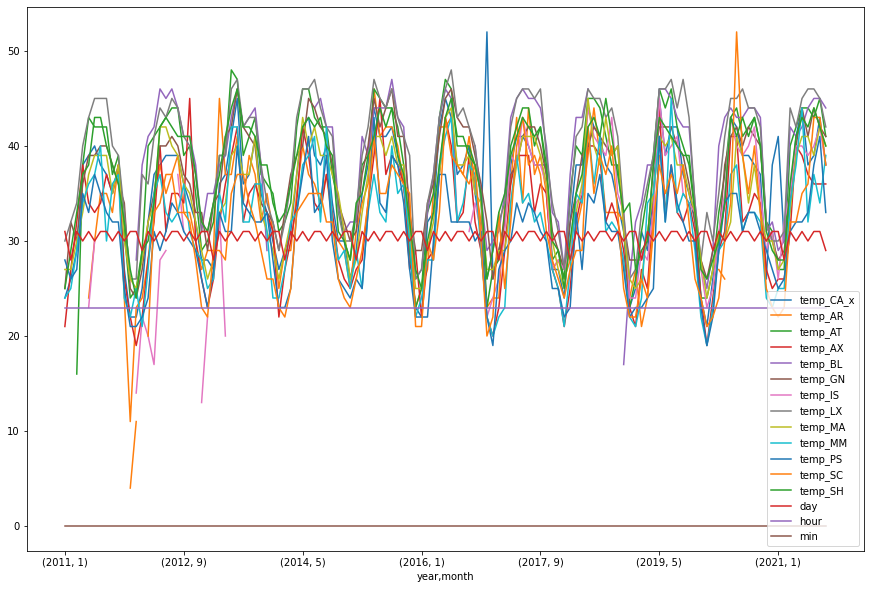

In [111]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
df_temp2011.groupby(['year', 'month']).max().plot()

<AxesSubplot:xlabel='year,month'>

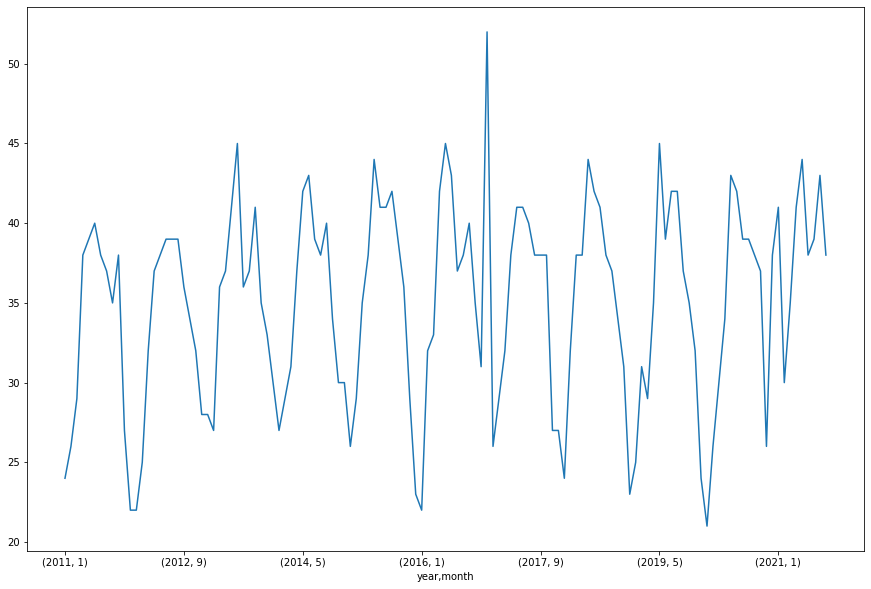

In [112]:
df_temp2011.groupby(['year', 'month'])['temp_CA_x'].max().plot()

In [26]:
df.loc[14428, 'tmpc'] = 19
df.loc[14428, 'tmpc']

19.0

<AxesSubplot:xlabel='year,month'>

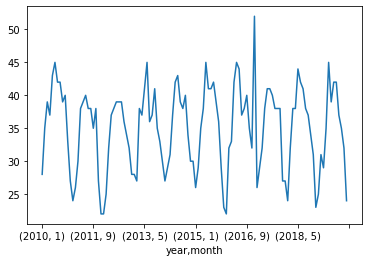

In [27]:
df.groupby(['year', 'month'])['tmpc'].max().plot()

<AxesSubplot:xlabel='year,month'>

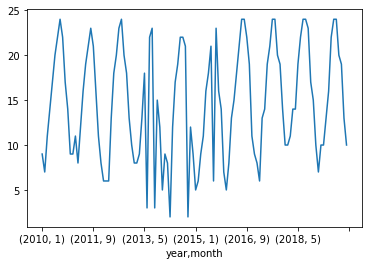

In [28]:
df.groupby(['year', 'month'])['tmpc'].min().plot()

<AxesSubplot:xlabel='year,month'>

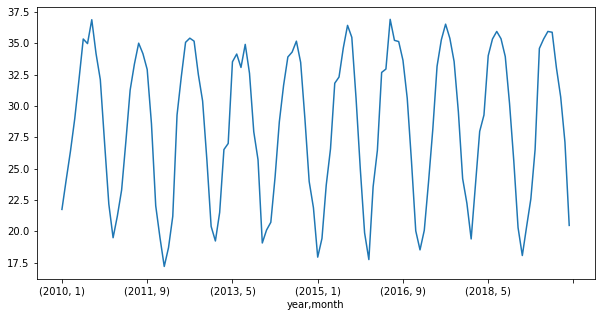

In [34]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

df_max = df.groupby(['year', 'month', 'day'])['tmpc'].max()
df_max.groupby(['year', 'month']).mean().plot()